<a href="https://colab.research.google.com/github/nicsim22/DS110-Content/blob/main/Lecture33AdvancedPlotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced plotting

*Cynthia was preparing a report to be shared with the World Health Organization that detailed her findings.  If there was one thing SAGE was bad at, it was turning numerical analysis results into convincing arguments.  It was a good thing she liked numbers, or the leaflet she got in San Francisco would have never convinced her to help.*

*But there were so many factors besides cash transaction frequency that were related in some way to the BND virus.  How could she convincingly show with charts that cash transactions were the single strongest predictor of the virus, in a wide variety of settings?*

## Seaborn
Seaborn is a high-level plotting library that uses matplotlib as its lower level.  It's popular among data scientists for providing nicer-looking plots, and it works with pandas dataframes by default.  A broader gallery of examples is available at https://seaborn.pydata.org/examples/index.html, and the seaborn example code here is modified from there.

In [ ]:
import seaborn as sns
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Faceted histograms

Sometimes the story's not best told with one histogram, but one for each group.

The thing to note here is how concise the code is - a single displot ("dis" = "distribution") command can break down the data by species and sex, and make a histogram plot for each combination.

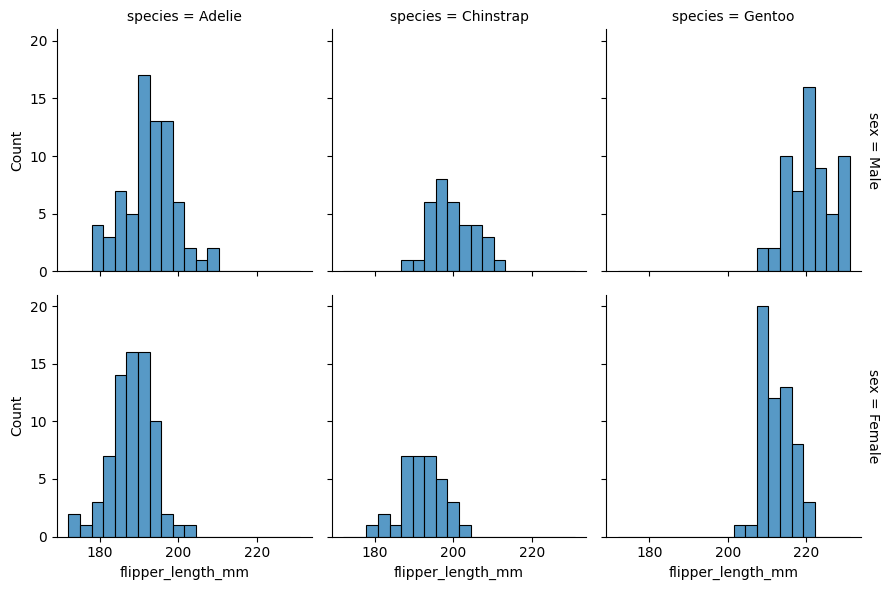

In [ ]:
# From https://seaborn.pydata.org/examples/faceted_histogram.html

sns.displot(df, #displot = distribution plot
            x="flipper_length_mm", #historgram for flipperlength on x axis
            col="species",
            row="sex",
            binwidth=3,
            height=3,
            facet_kws={'margin_titles':True},);

## Bar charts with confidence intervals

The error bars are 95% confidence intervals by default, achieved by "bootstrapping" or resampling the existing data repeatedly.  A "ci=None" argument to catplot() would disable them.  ("cat" = "categorical")

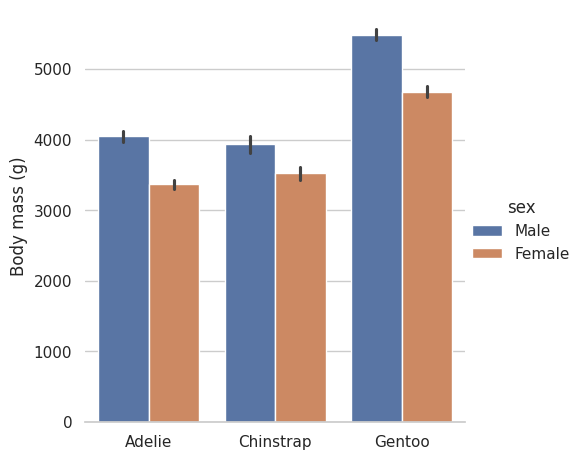

In [ ]:
# https://seaborn.pydata.org/examples/grouped_barplot.html

# Add horizontal lines to make it easier to see levels
sns.set_theme(style="whitegrid") #add only horizontal lines but not vertical lines

# Draw a nested barplot by species and sex
g = sns.catplot(data=df,  #catplot = catergory plot
                kind="bar",
                x="species",
                y="body_mass_g",
                hue="sex")
g.despine(left=True) # Removes left axis line
g.set_axis_labels("", "Body mass (g)");

## Plotting a joint distribution

Another neat plot that Seaborn can do is that of a joint distribution of X and Y, where the marginalized distributions of X and Y alone can be seen at the borders of the plot.  With a further argument of hue, this can be done for several different distributions.

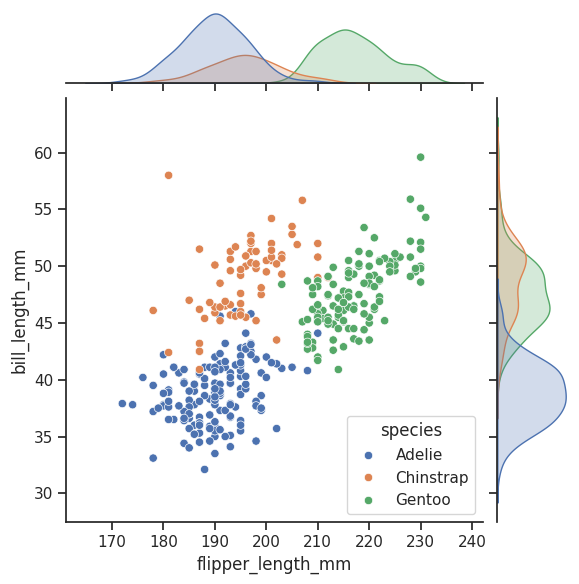

In [ ]:
#scatter plot with distribution of each set of data

sns.set_theme(style='ticks') # Remove grid to make it look cleaner
sns.jointplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species");

# 4-dimensional scatterplot

This example shows how you can plot more than 2 dimensions in a scatterplot, using color and size to designate the other dimensions.  The features can be numerical or categorical.


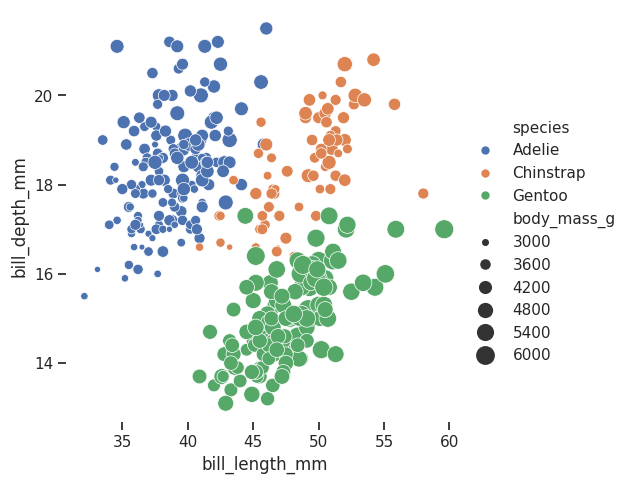

In [ ]:
g = sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    size="body_mass_g",
    sizes=(10, 200),) #change size of scatter plot dots
g.despine(left=True, bottom=True);

This also gives us a chance to show how we can choose a color palette.  A variety of named palettes are described at https://seaborn.pydata.org/tutorial/color_palettes.html.  You basically need to create a color map using sns.color_palette() to choose a named palette with additional argument as_cmap=True, then pass the colormap in as the palette argument to the plotter.

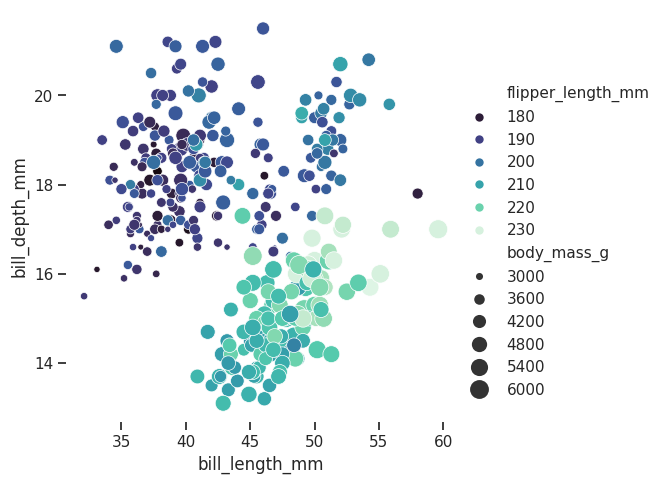

In [ ]:
cmap = sns.color_palette('mako', as_cmap=True) #asking for a diff color palatte called mako
g = sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="flipper_length_mm",
    size="body_mass_g",
    sizes=(10, 200),
    palette = cmap) #specify the color palette
g.despine(left=True, bottom=True);

## Plotly

[Plotly](https://plotly.com/python/) is a great data visualization software package. A major advantage of using plotly is you can easily create interactive exportable figures. There are two main ways to use plotly

1. <em>plotly.express</em>
    - Higher level interface that allows you to quickly create plots with only **a few lines of code**. We will demonstrate this by creating scatter plots and a chloropleth map plot.
    
2. <em> plotly.graph_objs </em>
    - This interface requires more programming but allows for **fine-tuned control** of plotly plots. Functions in plotly.express wrap around graph_objs. We use graph_objs to create a 3-D visualization and to make an interactive bubble chart of colors used by painters over time.

We will focus exclusively on 1.

### Plotly scatter plots

In [ ]:
#plotly is automatically interactive, very awesome.
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
fig = px.scatter(df, x="bill_length_mm", y="flipper_length_mm")
fig.show() #instead of plt.show() in matplotlib, use fig.show()

In [ ]:
fig = px.scatter(df,
                 x="bill_length_mm",
                 y="flipper_length_mm",
                 color="species",
                 hover_data=['bill_depth_mm', 'body_mass_g']) #hover data --> shows x and y values of each point when your cursor hovers over it
fig.show()

In [ ]:
fig = px.scatter(df, x="bill_length_mm", y="flipper_length_mm", color="species", symbol="species")
fig.show()

In [ ]:
fig = px.scatter(df, x="bill_length_mm", y="flipper_length_mm", color='bill_depth_mm')
fig.show()

## Plotly animations

In [ ]:
### Plotly animations
import plotly.express as px
gap_df = px.data.gapminder()
fig1 = px.scatter(gap_df,
                  x="gdpPercap",
                  y="lifeExp",
                  animation_frame="year",
                  animation_group="country",
                  size="pop",
                  color="continent",
                  hover_name="country",
                  log_x=True, #means that we want x axis to be on the log scale, so that x axis is not so long, can see movement better
                  size_max=55,
                  range_x=[100,100000],
                  range_y=[25,90])
fig1.show()